<a href="https://colab.research.google.com/github/MirzaUmar1/SIC-Artificial-Intelligence/blob/main/Classwork/SICClassTask09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 09: Titanic Survival Prediction Using Various Classification models**

## **1. Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Read in and explore the dataset**

In [2]:
test = pd.read_csv('/content/test (1).csv')
train = pd.read_csv('/content/train (1).csv')

## **3. Data Analysis**

In [3]:
# alphanumeric features
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **4. Data Visualization**

###**a. Visualize Gender feature**

Percentage of females who survived:  74.20382165605095
Percentage of males who survived:  18.890814558058924


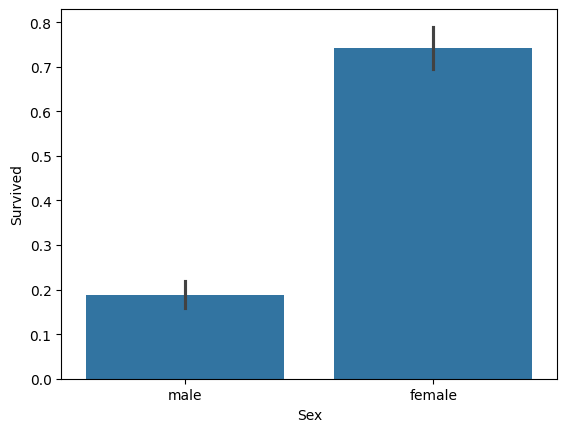

In [5]:
sns.barplot(x='Sex', y='Survived', data=train)
print("Percentage of females who survived: ", train.loc[train["Sex"]=='female', "Survived"].mean()*100)

print("Percentage of males who survived: ", train.loc[train["Sex"]=='male', "Survived"].mean()*100)

### **b. Visualize Pclass feature**

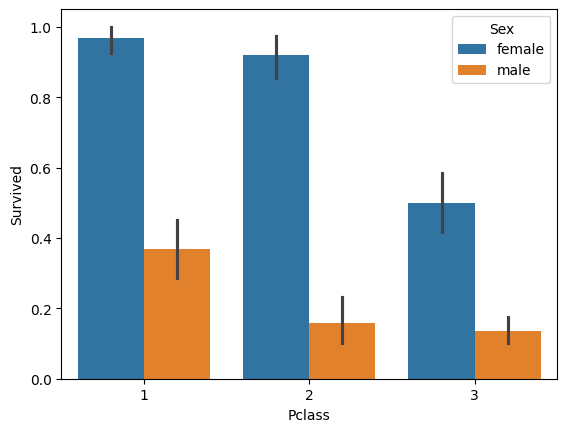

Percentage of Pclass = 1 who survived:  62.96296296296296
Percentage of Pclass = 2 who survived:  47.28260869565217
Percentage of Pclass = 3 who survived:  24.236252545824847


In [6]:
sns.barplot(x='Pclass', y='Survived', data=train, hue = 'Sex')
plt.show()
print("Percentage of Pclass = 1 who survived: ", train.loc[train['Pclass'] == 1, "Survived"].mean()*100)
print("Percentage of Pclass = 2 who survived: ", train.loc[train['Pclass'] == 2, "Survived"].mean()*100)
print("Percentage of Pclass = 3 who survived: ", train.loc[train['Pclass'] == 3, "Survived"].mean()*100)

### **c. Visualize Sibsp feature**

Percentage of SibSp = 0 who survived:  34.53947368421053
Percentage of SibSp = 1 who survived:  53.588516746411486
Percentage of SibSp = 2 who survived:  46.42857142857143


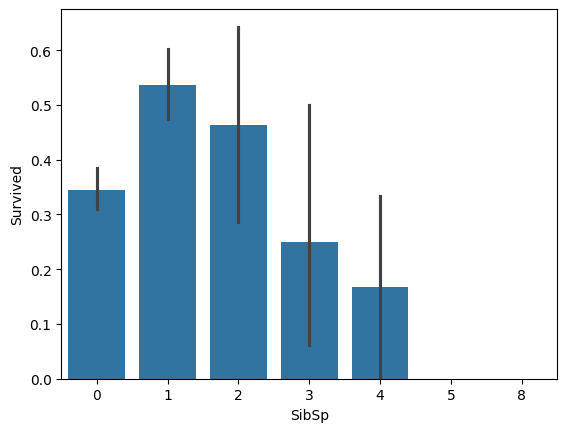

In [7]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
print("Percentage of SibSp = 0 who survived: ", train.loc[train['SibSp'] == 0, "Survived"].mean()*100)
print("Percentage of SibSp = 1 who survived: ", train.loc[train['SibSp'] == 1, "Survived"].mean()*100)
print("Percentage of SibSp = 2 who survived: ", train.loc[train['SibSp'] == 2, "Survived"].mean()*100)

##**5. Cleaning Data**

In [8]:
print(train.describe(include='all'))
print(test.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

###**a. We can drop the Cabin, Ticket, Name and Fare features since it's unlikely that these features yield any useful information**

In [9]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

###**b. Now we need to fill in the missing values in the Embarked feature.**

In [10]:
print('Number of people embarking in Southampton (S): ')
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C): ')
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q): ')
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S): 
644
Number of people embarking in Cherbourg (C): 
168
Number of people embarking in Queenstown (Q): 
77


###**It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.**

In [11]:
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

###**c. Fill in the missing values of age with mean (or median) age**

In [12]:
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())

###**d. Map each gender value to a numerical value.**

In [13]:
mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(mapping)
test['Sex'] = test['Sex'].map

##**6. Train Model for Predicting survival rate**

###**a. Train-test split**

In [14]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
X_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

###**b. Model using different classification models**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [16]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
linear_svc = LinearSVC()
svm = SVC(probability=True)

In [17]:
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)

LinearSVC()

###**c. Plot ROC curve and confusion matrices for each model. Also print the accuracy and AUC for each.**

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [19]:
models = [("Logistic Regression", log_reg),
          ("Decision Tree", decision_tree),
          ("k-NN",knn),
          ("SVM",svm)]

In [20]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

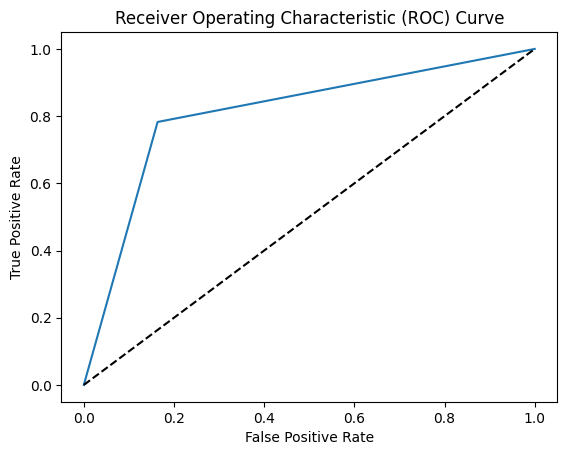

Logistic Regression - Accuracy: 0.82, AUC: 0.81


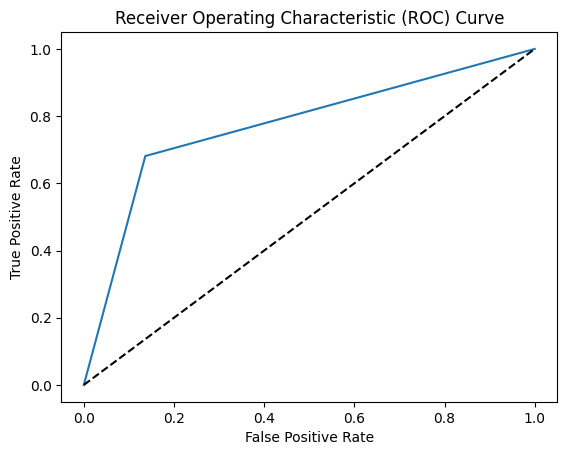

Decision Tree - Accuracy: 0.79, AUC: 0.77


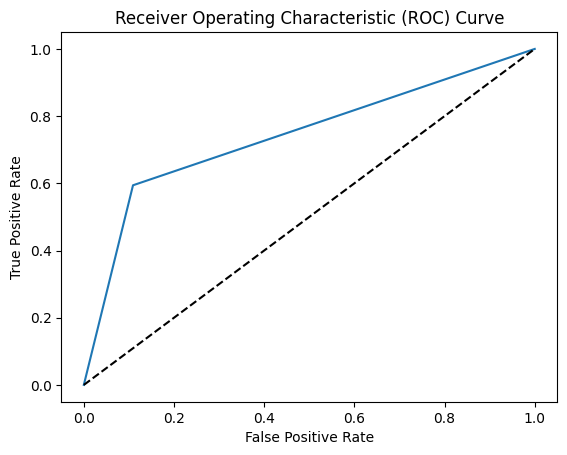

k-NN - Accuracy: 0.78, AUC: 0.74


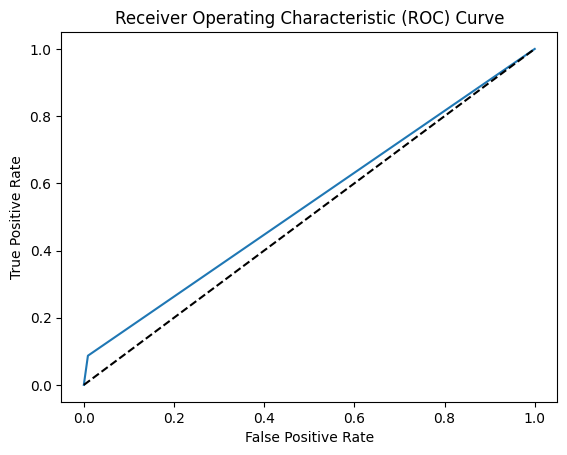

SVM - Accuracy: 0.64, AUC: 0.54


In [21]:
for name, model in models:
  y_pred = model.predict(x_val) # Removed [:, 1] to use the 1-dimensional output directly.
  fpr, tpr, thresholds = roc_curve(y_val, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  #plt.legend([name for name, _in models], loc="lower right")
  plt.show()

  y_pred = model.predict(x_val)
  accuracy = accuracy_score(y_val, y_pred)
  print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {roc_auc:.2f}")

In [22]:
log_clf = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
svm_clf = SVC(probability=True, random_state=42)

In [24]:
from sklearn.ensemble import VotingClassifier

In [27]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [30]:
voting_clf.score(X_train, y_train)

0.8665730337078652

Use ensemble algorithms

##**Logistic**

In [31]:
log_clf.fit(X_train, y_train)
log_clf.score(X_train, y_train)

0.7935393258426966

In [32]:
tree_clf.fit(X_train, y_train)
tree_clf.score(X_train, y_train)

0.8469101123595506

In [33]:
knn_clf.fit(X_train, y_train)
knn_clf.score(X_train, y_train)

0.8679775280898876

In [34]:
svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train)

0.6390449438202247

##**Bagging**

In [39]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [41]:

bag_clf.score(X_train, y_train)

0.848314606741573

##**Gradient Boosting**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gb_clf = GradientBoostingClassifier(n_estimators=600, max_depth=5, learning_rate=0.2, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=600,
                           random_state=42)

In [53]:
gb_clf.score(X_train, y_train)

0.9410112359550562